--Content Header--

1 Import libraries

2 Import Dataframe

3 Consider any security implications that might exist for this new data. Then Remove them.

4 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. 

5  The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

6 Overwrite this new dataframe with the filtered out rows.

7 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 

8 Create an appropriate visualization to show the distribution of profiles.

9 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

10 Compare customer Profiles

11 Produce charts to illustrate results

12 Export final data set

## Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r'C:\Users\13019\Documents\Emmanuel\Data Analysis\Data Immersion\4.x\05-2023 Instacart Basket Analysis';
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

## Step 1

In [3]:
ords_prods_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged_Part1.pkl')) 

In [4]:
ords_prods_customers_merged.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Busiest_days,Busiest_hours,max_order,loyalty_flag,average_order_price,spending_profile,shopper_frequency,median_days_since_prior_order,First Name,Last Name,Gender,STATE,Age,Number of Dependants,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Most orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423


## Step 2

In [ ]:
#02 Consider any security implications that might exist for this new data. 
#   You’ll need to address any PII data in the data before continuing your analysis.

# First and Last names 
# I will drop these columns from the data set

In [5]:
# Dropping PII Columns
ords_prods_customers_merged = ords_prods_customers_merged.drop(columns = ['First Name', 'Last Name'])

In [6]:
# PII columns successfully removed
ords_prods_customers_merged.head() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Busiest_days,Busiest_hours,max_order,loyalty_flag,average_order_price,spending_profile,shopper_frequency,median_days_since_prior_order,Gender,STATE,Age,Number of Dependants,Family Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Most orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Female,Alabama,31,3,married,40423


## Step 3

In [5]:
#03 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. 
#   You’ll need to create a “Region” column based on the “State” column from your customers data set.
#   Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#   Determine whether there’s a difference in spending habits between the different U.S. regions. 
#   (Hint: You can do this by crossing the variable you just created with the spending flag.)

result = []

for value in ords_prods_customers_merged["STATE"]:
  if value in {'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'}: 
    result.append("Northeast")
  elif value in {'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio','North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'}:
    result.append("Midwest")  
  elif value in {'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida','Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'}:
    result.append("South")
  elif value in {'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'}:
    result.append("West")   
  else:
    result.append("Not enough data")


In [6]:
ords_prods_customers_merged['State Region'] = result

In [7]:
ords_prods_customers_merged['State Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: State Region, dtype: int64

In [8]:
ords_prods_customers_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Busiest_days,Busiest_hours,max_order,loyalty_flag,average_order_price,spending_profile,shopper_frequency,median_days_since_prior_order,First Name,Last Name,Gender,STATE,Age,Number of Dependants,Family Status,Income,State Region
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Most orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South


In [9]:
ords_prods_customers_merged.groupby('State Region')['prices'].mean() 

State Region
Midwest      12.715483
Northeast    11.554997
South        12.195577
West         11.319834
Name: prices, dtype: float64

Midwest has the highest average spending amount by a small margin.

## Step 4

In [10]:
ords_prods_customers_merged.shape

(32404859, 31)

In [11]:
#04 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
#   Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
#   Make sure you export this sample.

ords_prods_customers_merged_no_low_activity_customers = ords_prods_customers_merged 

In [12]:
# Overwrite this new dataframe with the filtered out rows
ords_prods_customers_merged_no_low_activity_customers = ords_prods_customers_merged_no_low_activity_customers.loc[ords_prods_customers_merged_no_low_activity_customers['max_order'] > 5] 

In [13]:
ords_prods_customers_merged_no_low_activity_customers.shape

(30171424, 31)

In [28]:
ords_prods_customers_merged_no_low_activity_customers['max_order'].describe() 

count    3.017142e+07
mean     3.519922e+01
std      2.475268e+01
min      6.000000e+00
25%      1.500000e+01
50%      2.900000e+01
75%      4.900000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [30]:
ords_prods_customers_merged_no_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers_merged_no_low_activity_customers_4_10.pkl'))

## Step 5

In [31]:
#05 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different
#   products and are, thus, curious about customer profiling in their database. 
#   Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
#   You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.
#   (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
ords_prods_customers_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,Busiest_days,Busiest_hours,max_order,loyalty_flag,average_order_price,spending_profile,shopper_frequency,median_days_since_prior_order,First Name,Last Name,Gender,STATE,Age,Number of Dependants,Family Status,Income,State Region
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Regularly busy,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Regular hours,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Least orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Slowest days,Most orders,10,New customer,6.367797,Low_spender,Non-frequent_customer,20.5,Linda,Nguyen,Female,Alabama,31,3,married,40423,South


In [89]:
ords_prods_customers_merged[['Family Status','Age','Number of Dependants','Income','order_hour_of_day','orders_day_of_week','days_since_prior_order','product_name']].head()


,Family Status,Age,Number of Dependants,Income,order_hour_of_day,orders_day_of_week,days_since_prior_order,product_name
0,married,31,3,40423,8,2,NaN,Soda
1,married,31,3,40423,7,3,15.0,Soda
2,married,31,3,40423,12,3,21.0,Soda
3,married,31,3,40423,7,4,29.0,Soda
4,married,31,3,40423,15,4,28.0,Soda


In [21]:
#Profiling based on Parent Stage/Status
ords_prods_customers_merged.loc[(ords_prods_customers_merged['Age'] <= 35) & (ords_prods_customers_merged['Number of Dependants'] > 0), 'PARENT_STAGE_FLAG'] = 'Young_Parent'

In [22]:
ords_prods_customers_merged.loc[(ords_prods_customers_merged['Age'] > 35) & (ords_prods_customers_merged['Number of Dependants'] > 0), 'PARENT_STAGE_FLAG'] = 'Older_Parent'

In [23]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['Number of Dependants'] == 0, 'PARENT_STAGE_FLAG'] = 'Childless'

In [24]:
#Profiling based on Parental Status
ords_prods_customers_merged['PARENT_STAGE_FLAG'].value_counts(dropna = False) 

Older_Parent    17437159
Childless        8097503
Young_Parent     6870197
Name: PARENT_STAGE_FLAG, dtype: int64

## Step 6

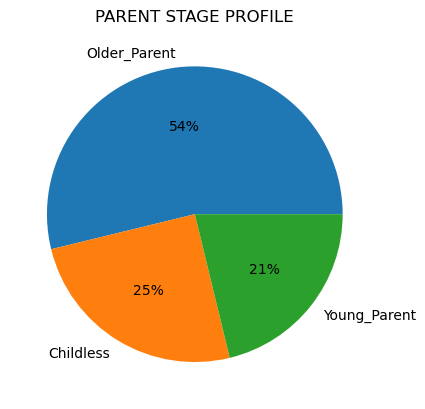

In [25]:
#06 Create an appropriate visualization to show the distribution of profiles.
Age_Pie_Chart=ords_prods_customers_merged['PARENT_STAGE_FLAG'].value_counts().plot.pie(title='PARENT STAGE PROFILE',label='',autopct=('%1.f%%'))

In [26]:
#export
Age_Pie_Chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_Pie_Chart_4_10.png')) 

## Step 7

In [27]:
#07 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Age_Statistics = ords_prods_customers_merged.groupby(['PARENT_STAGE_FLAG']).agg({'days_since_prior_order':['min','max','mean'],'prices':['sum','max','mean']});
Age_Statistics

days_since_prior_order                        prices  \
                                     min   max       mean          sum   
PARENT_STAGE_FLAG                                                        
Childless                            0.0  30.0  11.080805   98216578.1   
Older_Parent                         0.0  30.0  11.113630  206904743.5   
Young_Parent                         0.0  30.0  11.107277   83096201.0   

                                       
                       max       mean  
PARENT_STAGE_FLAG                      
Childless          99999.0  12.129243  
Older_Parent       99999.0  11.865737  
Young_Parent       99999.0  12.095170

In [28]:
#Trim high prices
ords_prods_customers_merged.loc[ords_prods_customers_merged['prices'] >100, 'prices'] = np.nan

In [29]:
Age_Statistics = ords_prods_customers_merged.groupby(['PARENT_STAGE_FLAG']).agg({'days_since_prior_order':['min','max','mean'],'prices':['sum','max','mean']});
Age_Statistics

days_since_prior_order                        prices        \
                                     min   max       mean          sum   max   
PARENT_STAGE_FLAG                                                              
Childless                            0.0  30.0  11.080805   63069776.1  25.0   
Older_Parent                         0.0  30.0  11.113630  135870595.5  25.0   
Young_Parent                         0.0  30.0  11.107277   53485749.0  25.0   

                             
                       mean  
PARENT_STAGE_FLAG            
Childless          7.789975  
Older_Parent       7.793247  
Young_Parent       7.786478

## Step 8

In [ ]:
#08 so far, there's no difference in any of these profile filters

In [30]:
#crosstab between region and Age_Flag
region_age=pd.crosstab(ords_prods_customers_merged['State Region'],ords_prods_customers_merged['PARENT_STAGE_FLAG'],dropna=False)

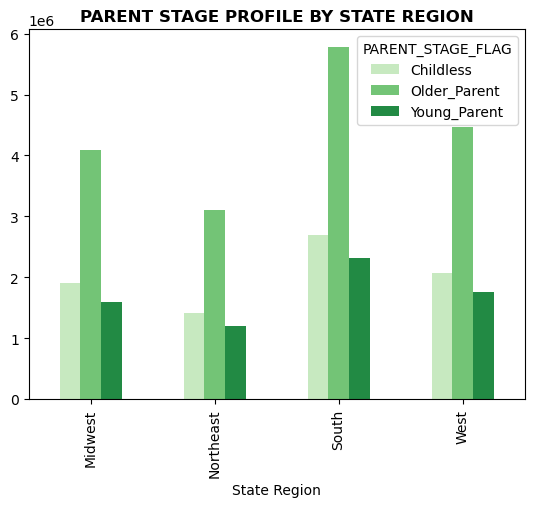

In [43]:
#Bar Chart for Parent Age Profile per State Region
Regions_Parent_Stage=region_age.plot.bar(color=sns.color_palette('Greens',3))
plt.title('PARENT STAGE PROFILE BY STATE REGION',fontweight='bold')
plt.show()

In [44]:
#Export
Regions_Parent_Stage.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Regions_Parent_Stage_Bar_Chart_4_10.png'))

In [6]:
#import department dataframe
df_dep=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [7]:
df_dep.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [8]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [9]:
#make a copy of dataframe
df = ords_prods_customers_merged

In [38]:
#merging department data frame with df datadrame
df_final=ords_prods_customers_merged.merge(df_dep,on='department_id')

In [39]:
# creating a crosstab between department and age
department_age=pd.crosstab(df_final['department'],df_final['PARENT_STAGE_FLAG'],dropna=False)

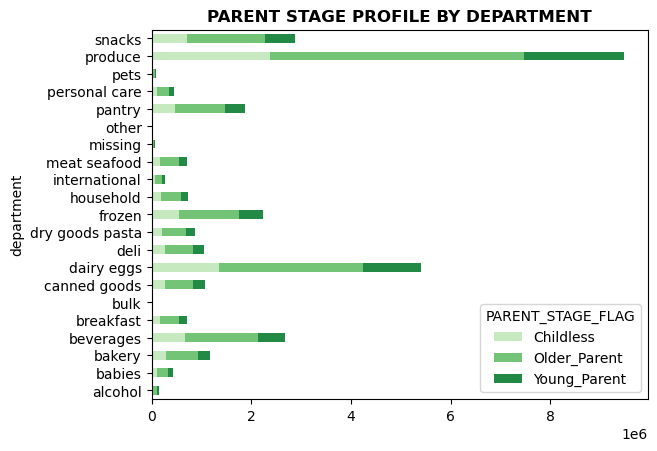

In [45]:
#creating a stacked bar chart of age and department
dept_parent_stage=department_age.plot.barh(stacked=True,color=sns.color_palette('Greens',3))
plt.title('PARENT STAGE PROFILE BY DEPARTMENT',fontweight='bold')
plt.show()

In [46]:
#export
dept_parent_stage.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_parent_stage_4_10.png'))

In [58]:
# profiling based on income
ords_prods_customers_merged.loc[ords_prods_customers_merged['Income']<=60000,'Income_flag']='Low income'

In [59]:
ords_prods_customers_merged.loc[(ords_prods_customers_merged['Income']>60000) & (ords_prods_customers_merged['Income']<=120000),'Income_flag']='Middle income'

In [53]:
ords_prods_customers_merged.loc[ords_prods_customers_merged['Income']>120000,'Income_flag']='High income'

In [60]:
ords_prods_customers_merged['Income_flag'].value_counts(dropna=False)

Middle income    16673067
High income       9571100
Low income        6160692
Name: Income_flag, dtype: int64

In [61]:
# crosstab between income and parent stage flag
income_parent_stage=pd.crosstab(ords_prods_customers_merged['Income_flag'],ords_prods_customers_merged['PARENT_STAGE_FLAG'],dropna=False)

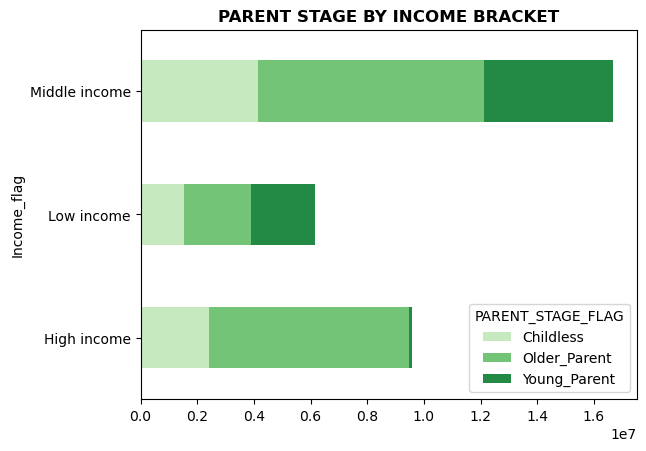

In [62]:
#Stacked bar chart for parent stage and income bracket
parent_stage_income=income_parent_stage.plot.barh(stacked=True,color=sns.color_palette('Greens',3))
plt.title('PARENT STAGE BY INCOME BRACKET',fontweight='bold')
plt.show() 

Some observations: Young parents are often not in the high income bracket. There are than even distribution of parents in the middle to low income bracket, though. 

In [63]:
parent_stage_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','parent_stage_income_4_10.png'))

## Step 10

In [64]:
ords_prods_customers_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_final_4_10.pkl'))